In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
#currently only 900 rows each. we can probably search for more niche terms similar to the 3 roles and add these roles inside the data files

data_eng = pd.read_csv('../src/output/data-engineer_28-03-2023.csv',encoding= 'unicode_escape')
data_sci = pd.read_csv('../src/output/data-science_27-03-2023.csv',encoding= 'unicode_escape')
data_an = pd.read_csv('../src/output/data-analyst_28-03-2023.csv',encoding= 'unicode_escape')
data_an.head()

,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url
0,J&T EXPRESS SINGAPORE PTE. LTD.,2.5,Junior Data Analyst,Singapore,3000 - 3000,"Collect and clean data from various sources, e...",https://www.glassdoor.sg/partner/jobListing.ht...
1,ATT DIGIVERSE PTE. LTD.,NaN,Data Analyst [Junior],Singapore,4000 - 6000,Work with business users and data platform tea...,https://www.glassdoor.sg/partner/jobListing.ht...
2,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...
3,ARYAN SOLUTIONS PTE. LTD.,4.2,Junior Data Analyst,Singapore,4000 - 8000,Place client value and human experience at the...,https://www.glassdoor.sg/partner/jobListing.ht...
4,TRUST RECRUIT PTE. LTD.,5.0,Data Analyst (Tableau/ PowerBI/ R/ Python/ In ...,Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...


In [142]:
data_eng['y_role'] = 'data_engineer'
data_sci['y_role'] = 'data_science'
data_an['y_role'] = 'data_analyst'

data_an.head()


,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url,y_role
0,J&T EXPRESS SINGAPORE PTE. LTD.,2.5,Junior Data Analyst,Singapore,3000 - 3000,"Collect and clean data from various sources, e...",https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
1,ATT DIGIVERSE PTE. LTD.,NaN,Data Analyst [Junior],Singapore,4000 - 6000,Work with business users and data platform tea...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
2,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
3,ARYAN SOLUTIONS PTE. LTD.,4.2,Junior Data Analyst,Singapore,4000 - 8000,Place client value and human experience at the...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
4,TRUST RECRUIT PTE. LTD.,5.0,Data Analyst (Tableau/ PowerBI/ R/ Python/ In ...,Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst


In [143]:
#Average company salary based on the range,and fill NA with average of each job type

def fn(x):
    if x == 0 :
        return 0
    else:
        s = x.split(' - ')
        s = sum(map(int,s))/len(s)
        return s

data_eng['company_salary'] = data_eng['company_salary'] .replace(np.nan,0)
data_sci['company_salary'] = data_sci['company_salary'] .replace(np.nan,0)
data_an['company_salary'] = data_an['company_salary'] .replace(np.nan,0)
data_eng['company_salary'] = data_eng['company_salary'].apply(fn)
data_sci['company_salary'] = data_sci['company_salary'].apply(fn)
data_an['company_salary'] = data_an['company_salary'].apply(fn)

#get average based on job type
#data_eng_avg = data_eng['company_salary'].mean()
#data_sci_avg = data_sci['company_salary'].mean()
#data_an_avg = data_an['company_salary'].mean()
#data_eng['company_salary'] = data_eng['company_salary'] .replace(0,data_eng_avg)
#data_sci['company_salary'] = data_sci['company_salary'] .replace(0,data_sci_avg)
#data_an['company_salary'] = data_an['company_salary'] .replace(0,data_an_avg)

data_raw1 = data_eng.append(data_sci).append(data_an)


In [144]:
data_raw1

,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url,y_role
0,Incube8 Pte Ltd,3.9,Data Engineer (Data Science),Novena,7500.0,"Maintain, build and iteratively improve existi...",https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
1,TRINITY CONSULTING SERVICES PTE. LTD.,4.1,Data Engineer,Singapore,7000.0,"Bachelors degree/Diploma in Computer Science,...",https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
2,ELLIOTT MOSS CONSULTING PTE. LTD.,3.0,Data Engineer,Singapore,8000.0,The candidate for the Senior Data Engineer rol...,https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
3,DYNAMIC HUMAN CAPITAL PTE. LTD.,3.9,Data Engineer,Singapore,6000.0,Cooperates with DevOps and Business Intelligen...,https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
4,SAKSOFT PTE LIMITED,3.7,Data Engineer,Singapore,9000.0,Minimum 8 years of extensive experience in dea...,https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
...,...,...,...,...,...,...,...,...
895,NCS,3.8,Data & Analytics Consultant (Nucleus Graduate ...,Singapore,73000.0,Translate customer pain-points into problem st...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
896,TRUST RECRUIT PTE. LTD.,5.0,"URGENT!!! Data Analyst (Game Industry, Python,...",Singapore,5500.0,"Leading 2D & 3D games, mobile & web games indu...",https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
897,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5500.0,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
898,SUCCESS HUMAN RESOURCE CENTRE PTE. LTD.,4.3,"Data Analyst, Institutional Statistics (Educat...",Singapore,3000.0,Collate and compile data from various sources/...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst


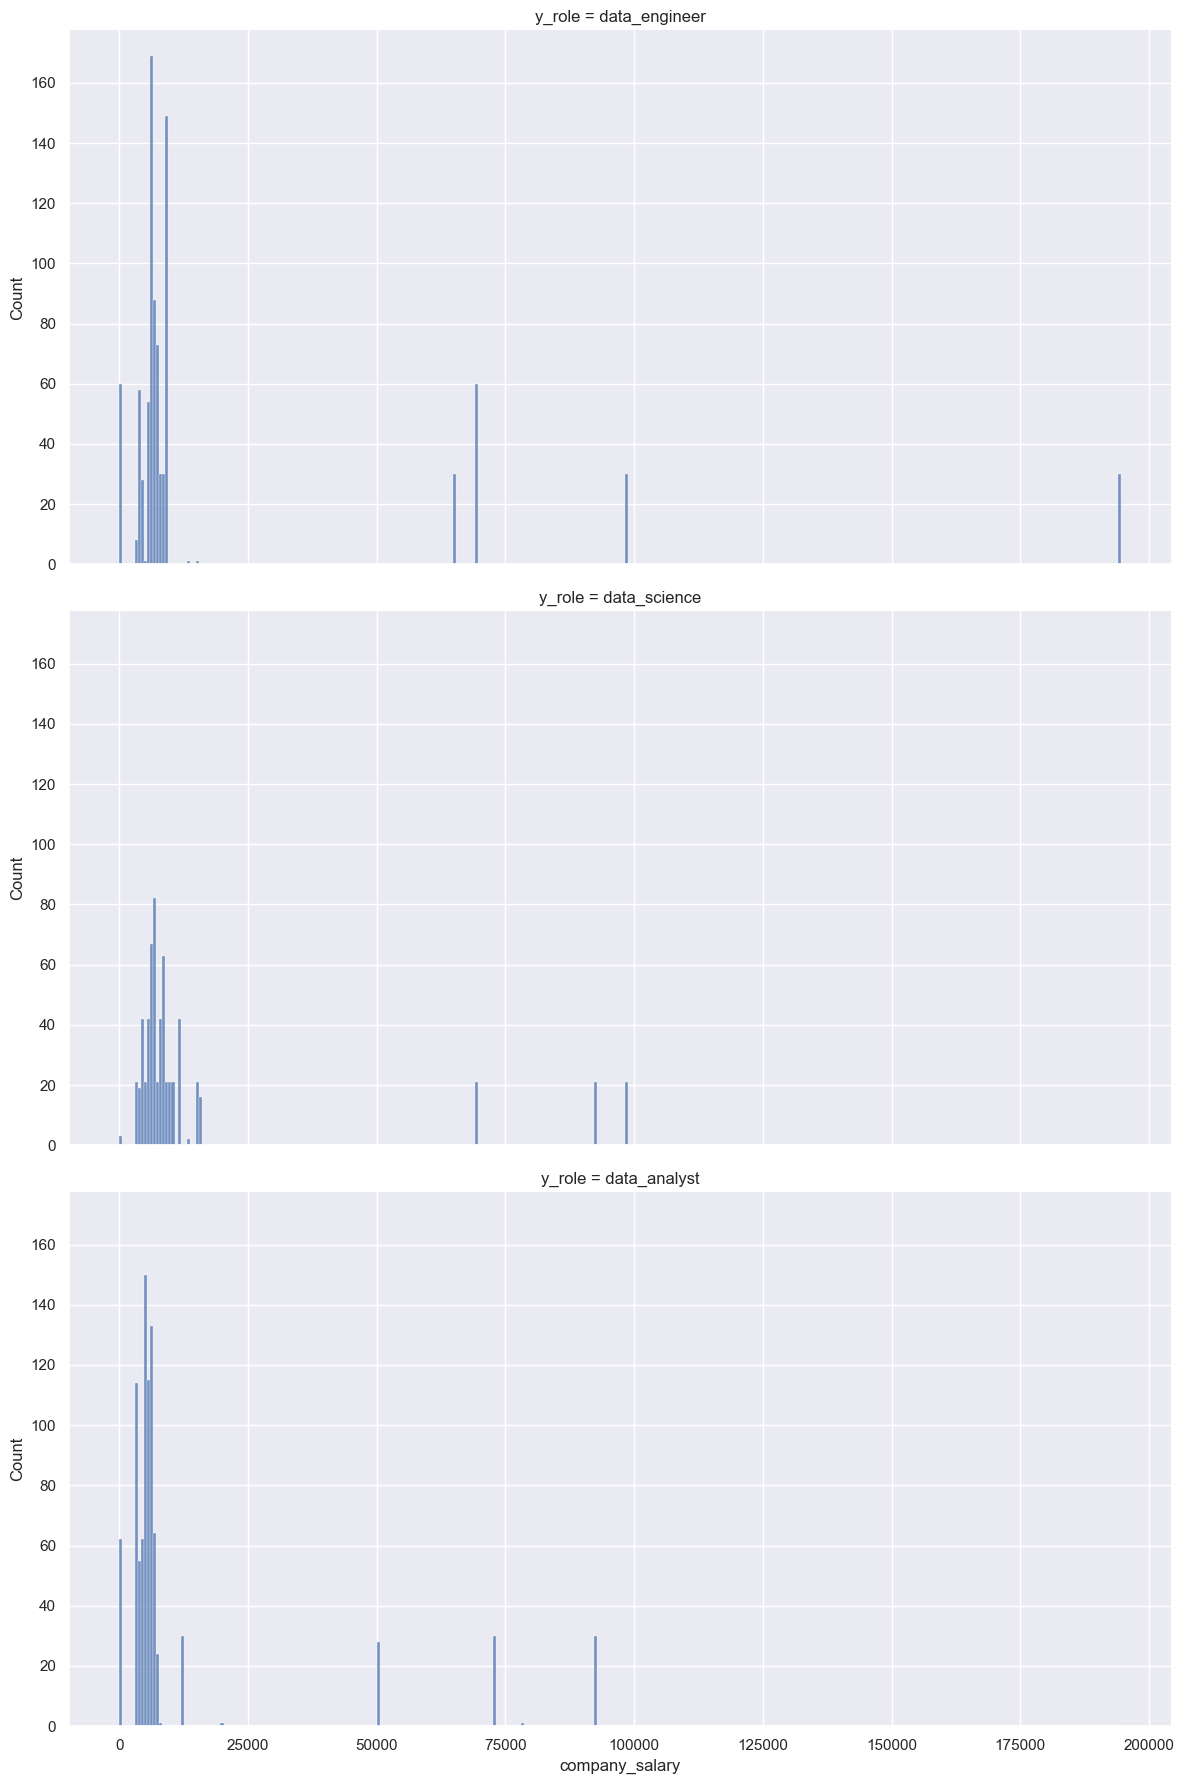

In [145]:
sns.set(rc={'figure.figsize':(15,25)})
sns.displot(data = data_raw1,x = 'company_salary',row = 'y_role',height = 6,aspect=2)
plt.show()

In [146]:
#get average based on job type
data_eng_avg = data_eng['company_salary'].mean()
data_sci_avg = data_sci['company_salary'].mean()
data_an_avg = data_an['company_salary'].mean()
data_eng['company_salary'] = data_eng['company_salary'] .replace(0,data_eng_avg)
data_sci['company_salary'] = data_sci['company_salary'] .replace(0,data_sci_avg)
data_an['company_salary'] = data_an['company_salary'] .replace(0,data_an_avg)

data_raw = data_eng.append(data_sci).append(data_an)

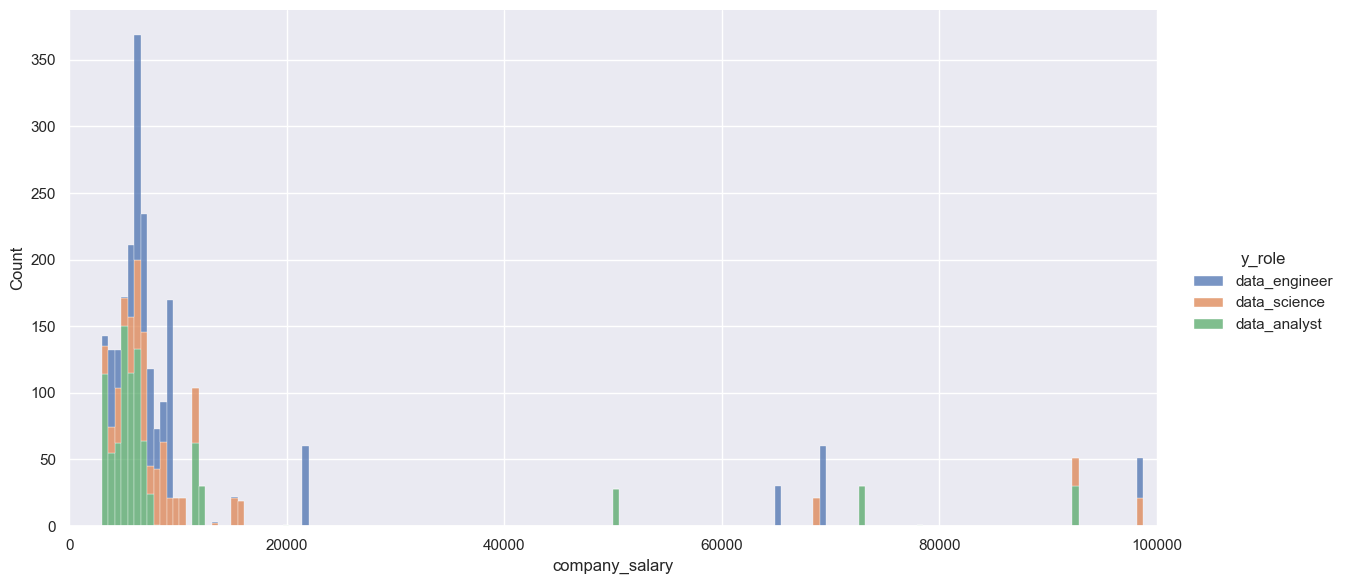

In [147]:
#plot with new data replacing 0 with average of job that we have
sns.displot(data = data_raw,x = 'company_salary',hue = 'y_role',height = 6,aspect=2,multiple='stack')
plt.xlim(0,100000)
plt.show()

Text processing referenced from https://www.kaggle.com/code/adarshsng/predicting-job-type-cat-using-job-description#Modeling-:---%3E

In [148]:
#! pip install langdetect
#! pip install translate
#! pip install gensim
#! python -m spacy download en_core_web_lg


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 777.1/777.1 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2023-03-30 12:22:23.801547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-03-30 12:22:23.801909: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

In [150]:
#text processing
from dateutil import parser
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from spacy.lang.en.stop_words import STOP_WORDS

from gensim.models import KeyedVectors

## for language detection
## warnings !!
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JeeJoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JeeJoo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [151]:
data_types_dict = {'companyName':str,'company_starRating':float,'company_offeredRole':str,'company_roleLocation':str,'company_salary':float,'listing_jobDesc':str,'requested_url':str,'y_role':str}
data_raw.dtypes
data_raw = data_raw.astype(data_types_dict)
#data_raw.dtypes
#data_raw['listing_jobDesc']
data_raw['listing_jobDesc'][899]

899    \nDigital Transformation & Strategy: Helping c...
899    Analyze SaaS numbers and help identify trends ...
Name: listing_jobDesc, dtype: object

In [152]:
#focusing on job description !!!

# Steps to be taken :
#
#     1. Text pre-processing:
#         1.1 Normalize case
#         1.2 Special character
#         1.3 Stop words
#         1.4 White space
#         1.5 Stemming
        
#     2. Feature extraction:
#         2.1 Word2vec embedding

In [153]:
def is_valid_date(date_str): # sub function
    try:
        parser.parse(date_str)
        return True
    except:
        return False
    
def date_removal(data):
    new_list = [' '.join([w for w in line.split() if not is_valid_date(w)]) for line in data]
    return (new_list[0])

def stemmer_and_stopWord(doc):    
    doc= nlp(doc)
    token_list = []
    for token in doc:
      lemma = token.lemma_
      if lemma == '-PRON-' or lemma == 'be':
        lemma = token.text
      token_list.append(lemma)

    stemmed = token_list
    
    # Create list of word tokens after removing stopwords
    
    filtered_sentence =[] 
    for word in stemmed[:100]:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return (' '.join(filtered_sentence))

def normaliz(filtered_sentence):
        
    words = [str(word).lower() for word in filtered_sentence.split()]
    return  ' '.join(words[:100])

# For number removal ~

def numbers_removal(data):
    s = [data]
    result = ''.join([i for i in s if not i.isdigit()])
    return (result)
# For punchuation & double white spaces ~

def punch_removal(words):
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in [words]]
    return re.sub(' +', ' ', stripped[:100][0])


def cleaner(data):
    string = [data]
    string = date_removal(string)
    # string = numbers_removal(string)
    string = punch_removal(string)
    string = stemmer_and_stopWord(string)
    string = normaliz(string)
    return string

In [154]:
print('* --------------- for raw data --------------- *')

lst=[]
for i in data_raw['listing_jobDesc']: # cleansing !!
    lst.append(cleaner(i))

data_raw['job_description']=pd.Series(lst) # updating the attributee !!

#print('* --------------- for test data --------------- *')

#list=[]
#for i in test['job_description']: # cleansing !!
#    list.append(cleaner(i))

#test['job_description']=pd.Series(list) # updating the attributee !!

* --------------- for raw data --------------- *


* ------------------------- for train data-------------------------------- *


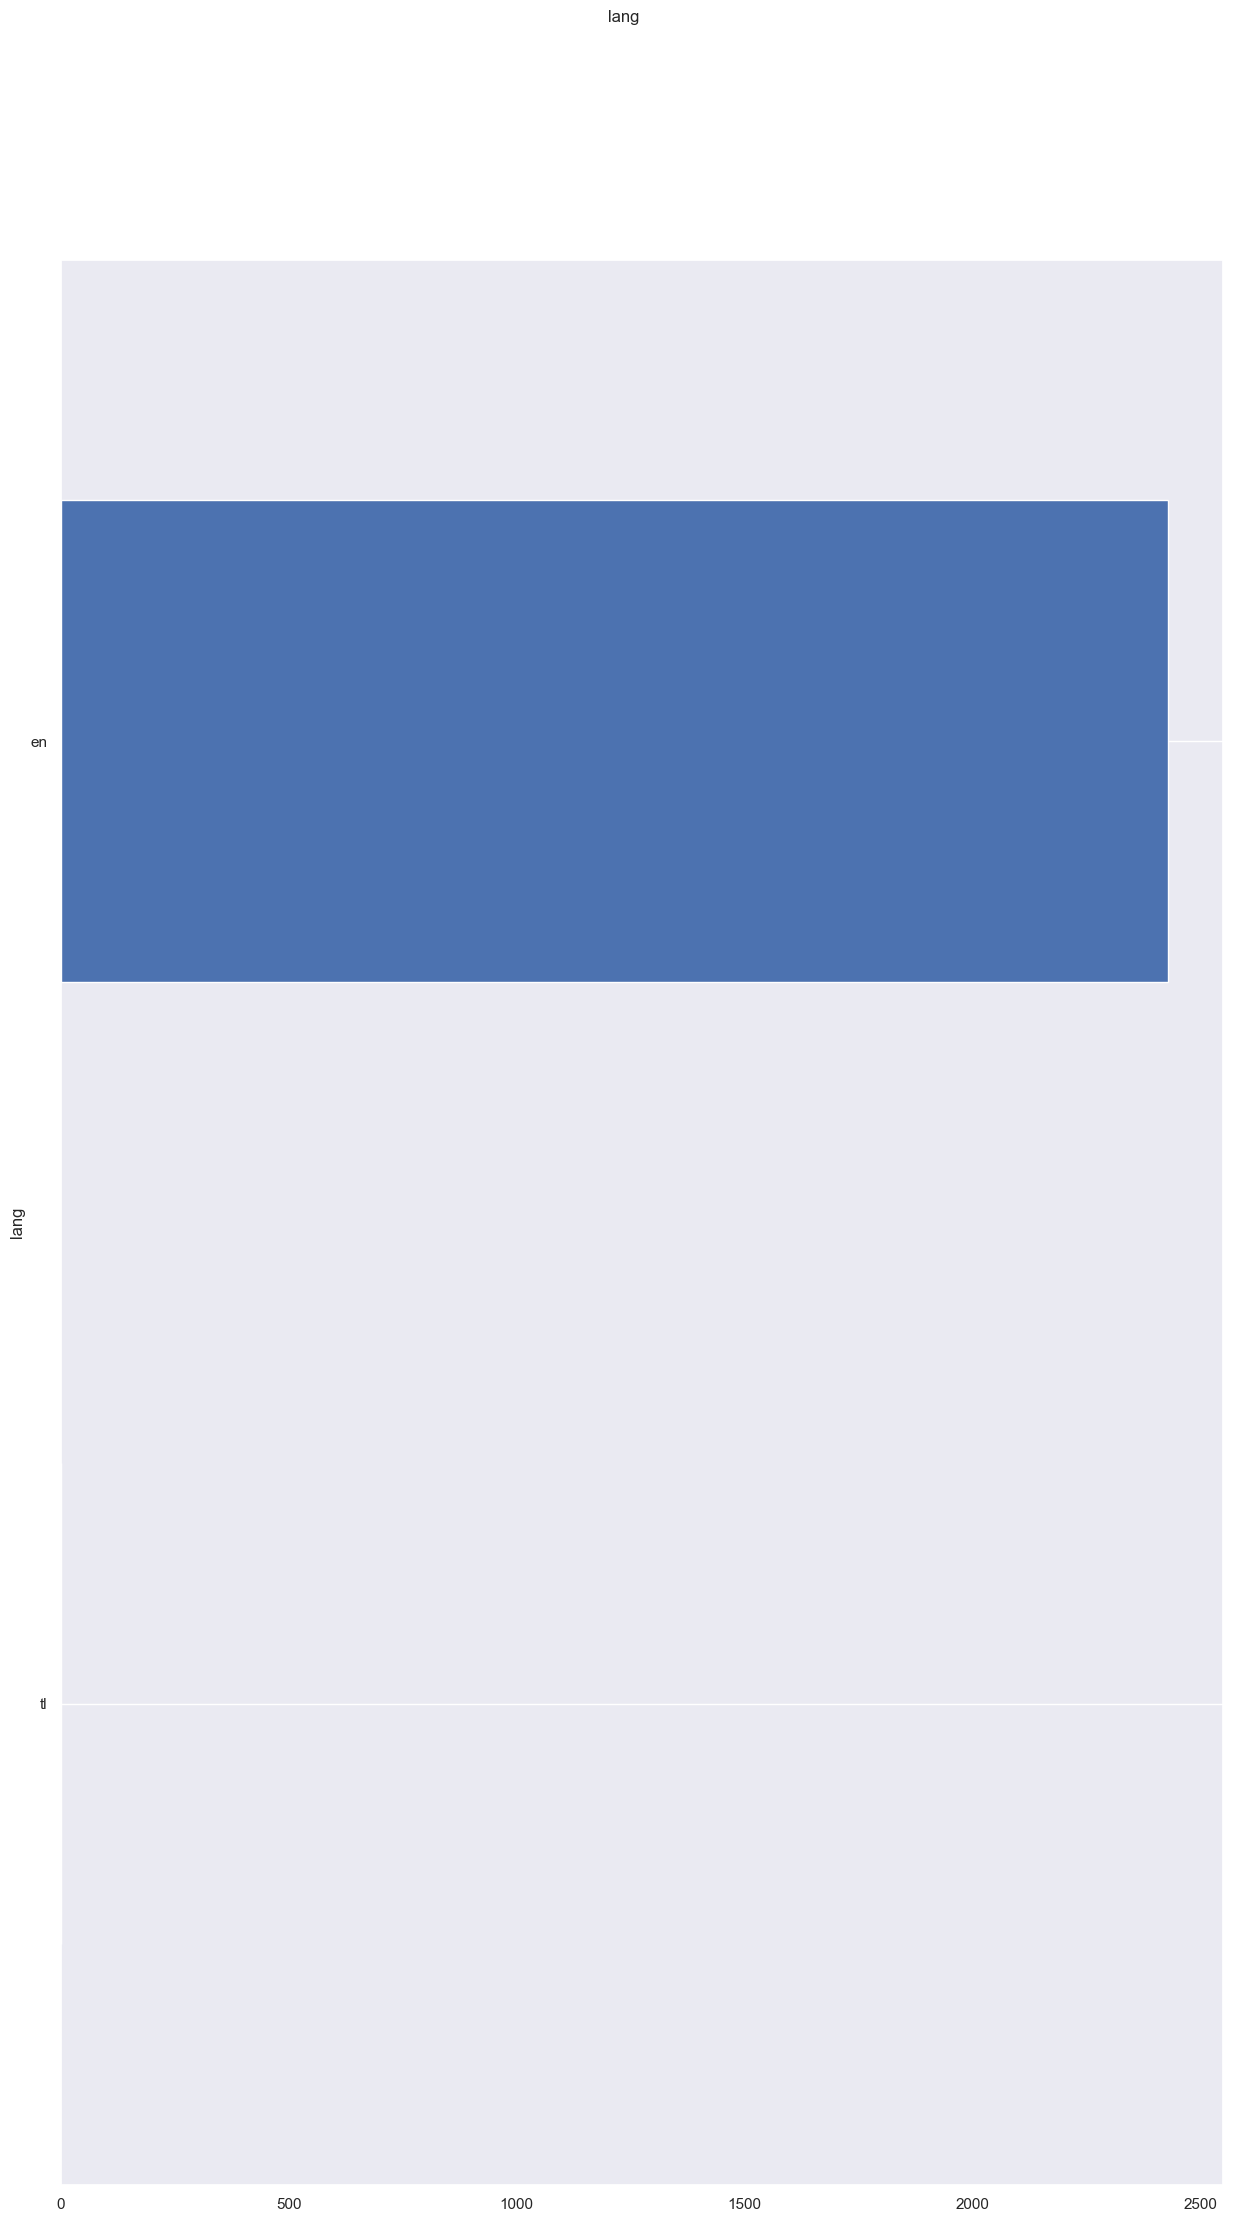

In [155]:
# adding a new attribute for differencing the language of teh 'job_description' !!
import langdetect

print('* ------------------------- for train data-------------------------------- *')

data_raw['lang'] = data_raw["listing_jobDesc"].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")

fig, ax = plt.subplots()
fig.suptitle('lang', fontsize=12)

data_raw['lang'].reset_index().groupby('lang').count().sort_values(by= "index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
plt.show()

#print('* -------------------------- for test data ------------------------------- *')

#test['lang'] = test["job_description"].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")

#fig, ax = plt.subplots()
#fig.suptitle('lang', fontsize=12)
#test['lang'].reset_index().groupby('lang').count().sort_values(by= "index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
#plt.show()

In [156]:
# Feature Extraction from the job discription :

print('* ------------------------- for train data-------------------------------- *')

# the relevance of these feature will be tested on the later stages !!

data_raw['word_count'] = data_raw["listing_jobDesc"].apply(lambda x: 
                                                     len(str(x).split(" ")))
data_raw['char_count'] = data_raw["listing_jobDesc"].apply(lambda x:
                                                     sum(len(word) 
                                                     for word in str(x).split(" ")))
data_raw['sentence_count'] = data_raw["listing_jobDesc"].apply(lambda x: 
                                                         len(str(x).split(".")))
data_raw['avg_word_length'] = data_raw['char_count'] / data_raw['word_count']
data_raw['avg_sentence_lenght'] = data_raw['word_count'] / data_raw['sentence_count']

#print('* ------------------------- for test data-------------------------------- *')

#test['word_count'] = test["job_description"].apply(lambda x: 
                                                   #len(str(x).split(" ")))
#test['char_count'] = test["job_description"].apply(lambda x: 
                                                   #sum(len(word) 
                                                   #for word in str(x).split(" ")))
#test['sentence_count'] = test["job_description"].apply(lambda x: 
                                                    #len(str(x).split(".")))
#test['avg_word_length'] = test['char_count'] / test['word_count']
#test['avg_sentence_lenght'] = test['word_count'] / test['sentence_count']

* ------------------------- for train data-------------------------------- *


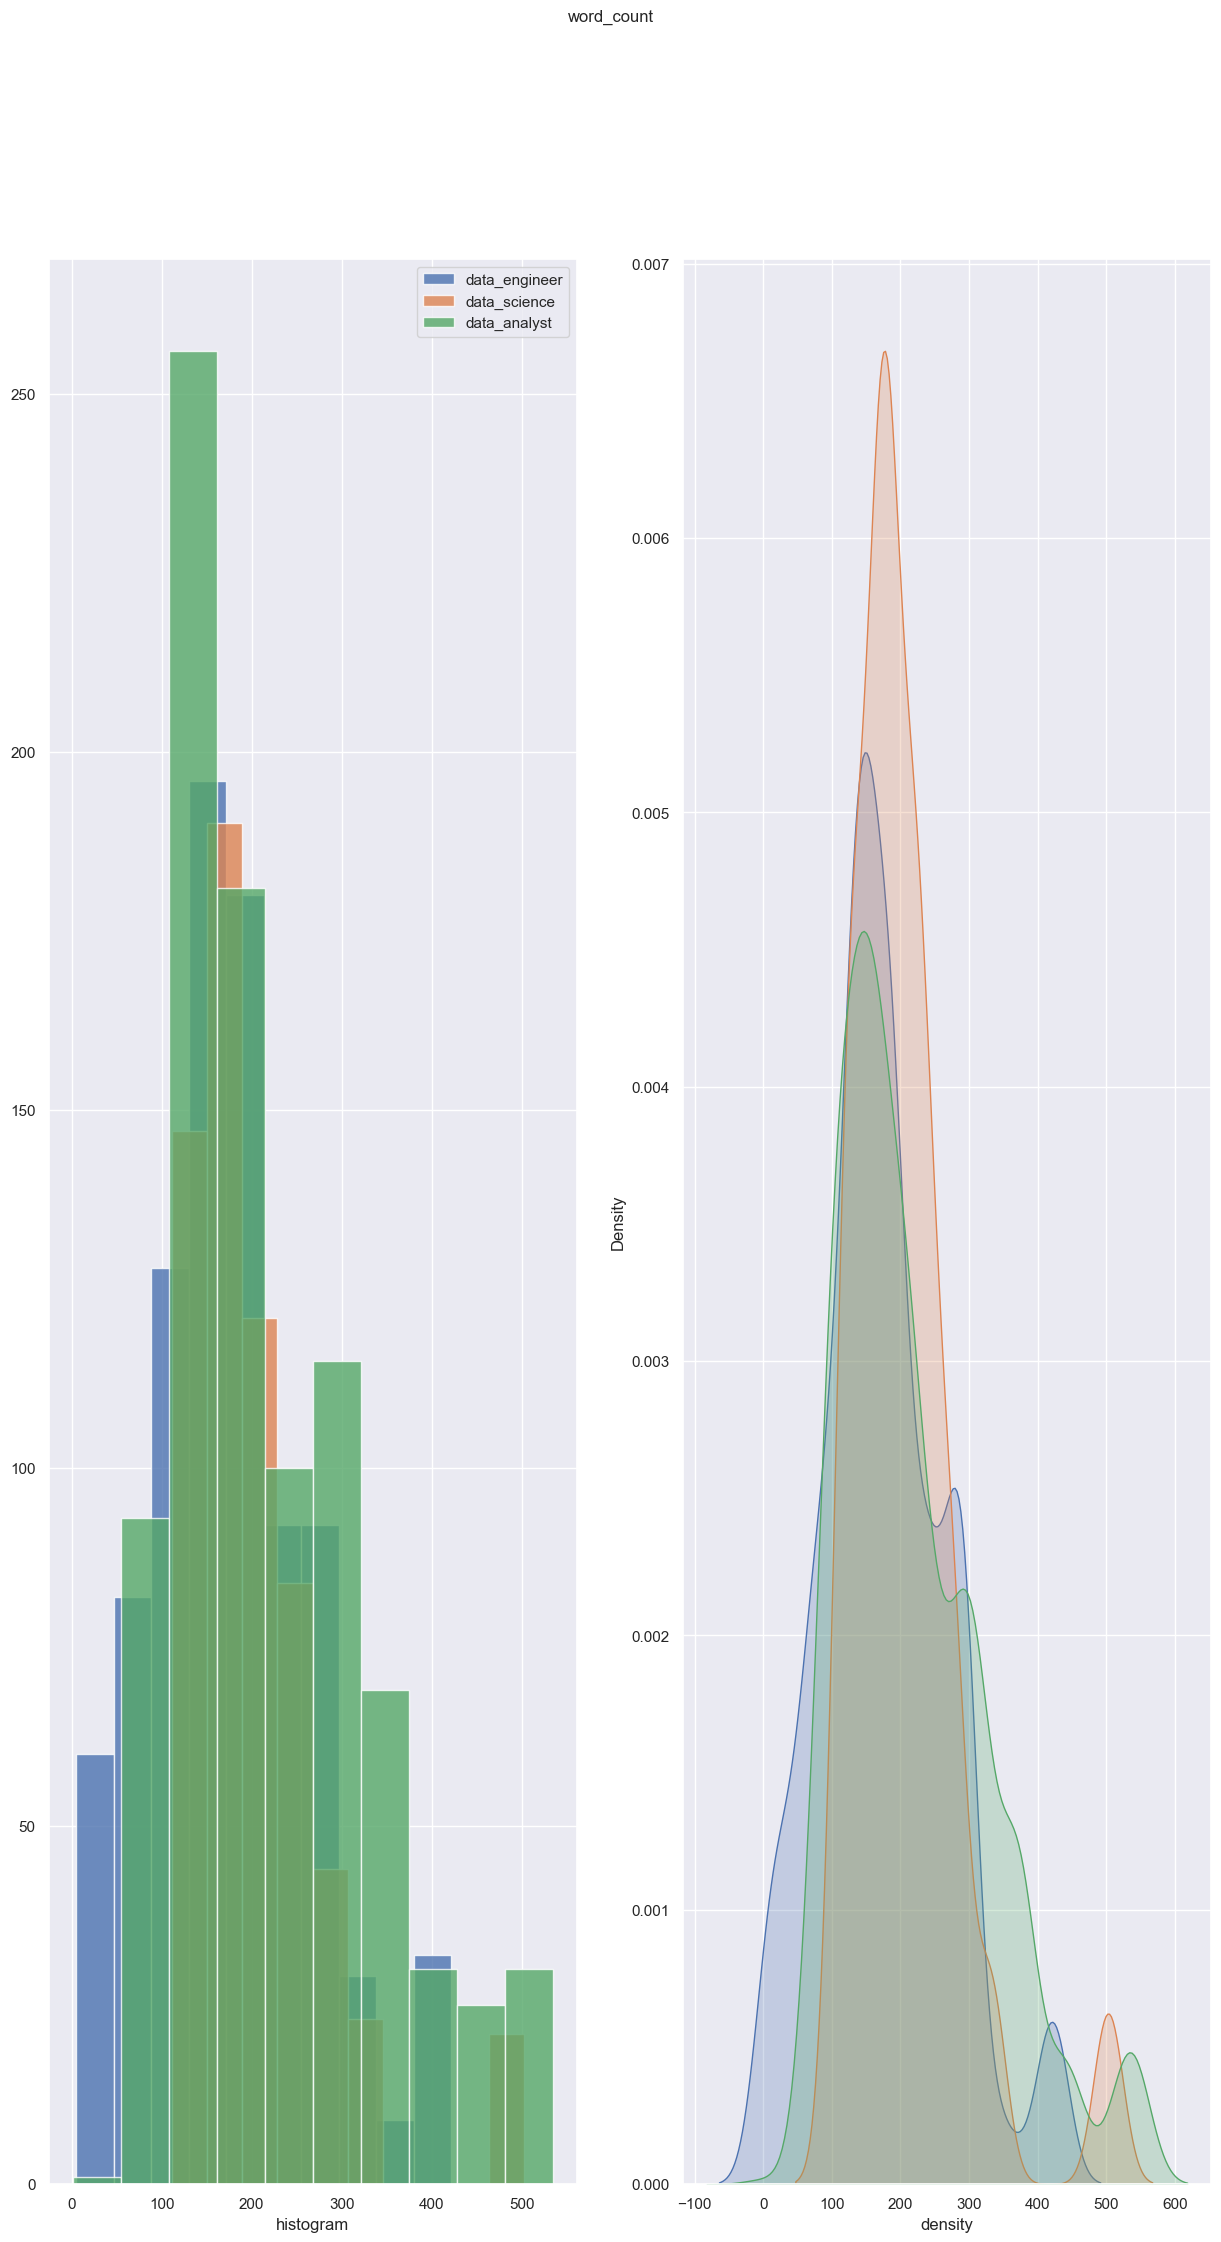

In [157]:
# A bivariate distributions to look at the correlation of a attribute with the target class !!

## conclusion : The categories have a similar length distribution but the samples have different sizes.

x = 'word_count'
y = 'y_role'

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in data_raw[y].unique():
    sns.distplot(data_raw[data_raw[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(data_raw[data_raw[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(data_raw[y].unique())
ax[1].grid(True)
plt.show()

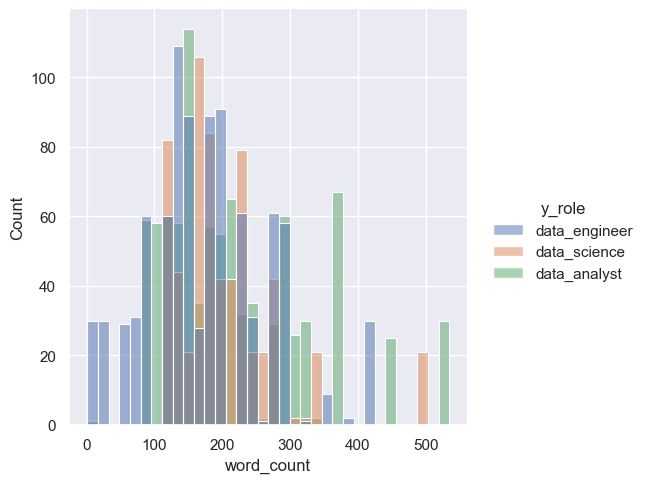

In [158]:
x = 'word_count'
y = 'y_role'
sns.displot(data_raw, x = x, hue = 'y_role')
plt.show()

In [159]:
import re
data_raw['clean_job_desc']=data_raw['listing_jobDesc'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
data_raw['clean_job_desc'] = data_raw['clean_job_desc'].apply(lambda x: re.sub(r'\d+', '', x))

data_raw['clean_job_desc']


0      maintain build and iteratively improve existin...
1      bachelors degreediploma in computer science co...
2      the candidate for the senior data engineer rol...
3      cooperates with devops and business intelligen...
4      minimum  years of extensive experience in deal...
                             ...                        
895    translate customer painpoints into problem sta...
896    leading d  d games mobile  web games industry\...
897    provide data analysis and insights to product ...
898    collate and compile data from various sourceso...
899    analyze saas numbers and help identify trends ...
Name: clean_job_desc, Length: 2430, dtype: object

In [165]:
from collections import Counter
data_raw['tokens'] = data_raw['clean_job_desc'].apply(lambda x: x.split())

data_raw['word_count_c'] = data_raw['tokens'].apply(lambda x: Counter(x))
word_counts = pd.DataFrame(list(data_raw['word_count_c'].apply(lambda x: x.items())))
word_counts[['job_type']] = pd.DataFrame(data_raw['y_role'])
#word_counts[['job_type', 'index']] = pd.DataFrame(word_counts['job_index'].tolist(), index=word_counts.index)
#word_counts = word_counts.drop('job_index', axis=1)
#word_counts = word_counts.pivot(index='index', columns='job_type', values='word_count').fillna(0)

#data_raw.head()
word_counts

ValueError: cannot reindex on an axis with duplicate labels